# Predicting the Heat Capacity of compounds following the Machine Learning for Materials Science: Best Practises article and code
Link to the Github: https://github.com/anthony-wang/BestPractices

This is code I based off of the Github above and related article. I have made some adjustments, however I do not claim this code as my own. I used this as a guide to help me learn Python and Machine Learning for the first time.

# Data Loading, Cleanup and Processing

### Importing necessary libraries

In [1]:
import numpy as np 
import os
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 
#makes graphs appear without using show()

%config InlineBackend.figure_format = 'retina'
#makes graphs look good usng magic fuction

from sklearn.model_selection import train_test_split

RNG_SEED = 42
np.random.seed(seed=RNG_SEED)

### Loading in the Data

In [2]:
#Reading the data in as a dataframe
df = pd.read_csv('cp_data.csv')

### Examining the data

In [3]:
print('Original DataFrame Shape:',df.shape)
print('-----------------------------------------')

print('LOOKING AT THE TOP OF THE DATA\n')
print(df.head())
print('-----------------------------------------')

print('LOOKING AT THE BOTTOM OF THE DATA\n')
print(df.tail())
print('-----------------------------------------')

print('DESCRITPION OF THE DATA\n')
print(df.describe())

Original DataFrame Shape: (4583, 3)
-----------------------------------------
LOOKING AT THE TOP OF THE DATA

  FORMULA  CONDITION: Temperature (K)  PROPERTY: Heat Capacity (J/mol K)
0    B2O3                      1400.0                            134.306
1    B2O3                      1300.0                            131.294
2    B2O3                      1200.0                            128.072
3    B2O3                      1100.0                            124.516
4    B2O3                      1000.0                            120.625
-----------------------------------------
LOOKING AT THE BOTTOM OF THE DATA

     FORMULA  CONDITION: Temperature (K)  PROPERTY: Heat Capacity (J/mol K)
4578     Zr1                       450.0                             26.246
4579     Zr1                       400.0                             25.935
4580     Zr1                       350.0                             25.606
4581     Zr1                       300.0                               

### Renaming the columns for brevity

In [4]:
print(df.columns)

Index(['FORMULA', 'CONDITION: Temperature (K)',
       'PROPERTY: Heat Capacity (J/mol K)'],
      dtype='object')


In [5]:
rename_dict = {df.columns[0]:'formula',
               df.columns[1]:'T',
               df.columns[2]:'Cp'}

df = df.rename(columns=rename_dict)
print(df.columns)
print('DataFrame shape befroe dropping NaN', df.shape)

Index(['formula', 'T', 'Cp'], dtype='object')
DataFrame shape befroe dropping NaN (4583, 3)


### Removing NaN and Unrealistic Values

In [6]:
#Dropping NaNs

df = df.dropna(axis=0,how='any')

print('DataFrame shape after dropping NaN', df.shape)
print('Checking tail to make sure everything still looks ok:')
print(df.tail())


DataFrame shape after dropping NaN (4570, 3)
Checking tail to make sure everything still looks ok:
     formula      T      Cp
4577     Zr1  500.0  26.564
4578     Zr1  450.0  26.246
4579     Zr1  400.0  25.935
4580     Zr1  350.0  25.606
4582     Zr1  298.0  25.202


In [7]:
#Removing unrealisic values

invalid_T = df['T']<0
invalid_Cp = df['Cp']<0
#creates a series of elements to drop form the dataframe

df = df.drop(df.loc[invalid_T].index,axis = 0) 
#this a multidimensional object so need to use loc[] to find all info realted to it
df = df.drop(df.loc[invalid_Cp].index,axis = 0) 

print('DataFrame shape after dropping Unrealistic values', df.shape)
print(df.head())


DataFrame shape after dropping Unrealistic values (4564, 3)
  formula       T       Cp
0    B2O3  1400.0  134.306
1    B2O3  1300.0  131.294
2    B2O3  1200.0  128.072
3    B2O3  1100.0  124.516
4    B2O3  1000.0  120.625


### Saving cleaned data to csv

In [8]:
df.to_csv('cp_data_cleaned.csv',index = False)

#IMPORTANT: Must set index=false or else the index will be printed out as part of the csv

# Splitting the DataSet 

### Sepearating the DataFrame into input(X) and output(Y)

In [9]:
X = df[['formula','T']]
y = df['Cp']

print('Shape of X',X.shape)
print('Shape of y',y.shape)

Shape of X (4564, 2)
Shape of y (4564,)


### Splitting the data, making sure to avoid leaking of the dataset across each split

In [10]:
#Creates a list of unique formulas
unique_formulae = X['formula'].unique()

print(f'{len(unique_formulae)} unique formulae\n')
print(f'List of unique formulae:\n{unique_formulae}')

all_formulae = unique_formulae.copy()

244 unique formulae

List of unique formulae:
['B2O3' 'Be1I2' 'Be1F3Li1' 'Al1Cl4K1' 'Al2Be1O4' 'B2H4O4' 'B2Mg1' 'Be1F2'
 'B1H4Na1' 'Br2Ca1' 'Al1N1' 'Al1Cl6Na3' 'Ba1H2O2' 'Al1Br3' 'Br3Zr1'
 'Br2Ti1' 'B1Ti1' 'Be2O4Si1' 'Br2Pb1' 'Al1' 'Br2Hg2' 'B1H3O3' 'Br3Ti1'
 'C1Cu1N1' 'B1' 'Al1F6Na3' 'Ca1H2O2' 'B2Be3O6' 'Al1Cl4Na1' 'Al1Cl6K3'
 'C0.98Nb1' 'Br2Hg1' 'Al1Cl1O1' 'Cl1H4N1O4' 'Be1F4Li2' 'C1Mg1O3' 'Br1H4N1'
 'Ca1I2' 'Al1F6Li3' 'Br4Mo1' 'Ba1' 'Br4Ti1' 'Ba1Br2' 'Be1O4S1' 'Ba1F2'
 'Ba1I2' 'Cl2Fe1' 'C1K1N1' 'Be1H2O2' 'Cs1' 'Al1H4Li1' 'C1Be2' 'Cr1'
 'Cs2O4S1' 'Cl1Cu1' 'Cu1F2' 'Al2O3' 'B1N1' 'Co1O4S1' 'Cu1O1' 'Br1Na1'
 'Cr2O3' 'Cs1F1' 'Cr2N1' 'Cl1Li1' 'Fe0.877S1' 'Cl1Na1' 'F2Hg1' 'Fe1H2O2'
 'Cs1H1O1' 'Br3Mo1' 'Br2Sr1' 'Cl2Hg2' 'Fe1O1' 'Co1' 'Cl1Cs1' 'Cu1H2O2'
 'Al1Li1O2' 'Co1F2' 'Br2Fe1' 'Fe1I2' 'Ga1' 'Cl1Li1O4' 'Cl2Cu1' 'Fe0.947O1'
 'Be1Cl2' 'Cl1K1' 'F1Na1' 'H3O4P1' 'Fe3O4' 'H1Na1O1' 'Fe2O12S3' 'H1Na1'
 'Cl1Na1O4' 'B1F4K1' 'Cu1O4S1' 'H1Li1' 'F2H1K1' 'B1H4Li1' 'Hg1O1' 'Be3N2'
 'Fe1' 'I2Mo1' 'Cu1F1'

In [11]:
#I have set the random seed to 42 above, using it now here
np.random.seed(seed=RNG_SEED)

# Define the proportional size of the dataset split
val_size = 0.20
test_size = 0.10
train_size = 1 - val_size - test_size

# Calculate the number of samples in each dataset split
num_val_samples = int(round(val_size * len(unique_formulae)))
num_test_samples = int(round(test_size * len(unique_formulae)))
num_train_samples = int(round(train_size * len(unique_formulae)))

##Pseudocode for what's happening:

# Creates a list of formulas for each set, without replacement
# Randomly chooses a formula
# Adds it to the set, if it's not already there

# Randomly choose the formulate for the validation dataset, and remove those from the unique formulae list
val_formulae = np.random.choice(all_formulae, size=num_val_samples, replace=False)
all_formulae = [f for f in all_formulae if f not in val_formulae]

# Randomly choose the formulate for the test dataset, and remove those from the unique formulae list
test_formulae = np.random.choice(all_formulae, size=num_test_samples, replace=False)
all_formulae = [f for f in all_formulae if f not in test_formulae]

# The remaining formulae will be used for the training dataset
train_formulae = all_formulae.copy()

print('Number of training formulae:', len(train_formulae))
print('Number of validation formulae:', len(val_formulae))
print('Number of testing formulae:', len(test_formulae))

Number of training formulae: 171
Number of validation formulae: 49
Number of testing formulae: 24


In [12]:
# Split the original dataset into the train/validation/test datasets using the formulae lists above
df_train = df[df['formula'].isin(train_formulae)]
df_val = df[df['formula'].isin(val_formulae)]
df_test = df[df['formula'].isin(test_formulae)]
#only adds the formulas that match the list for each set

print(f'train dataset shape: {df_train.shape}')
print(f'validation dataset shape: {df_val.shape}')
print(f'test dataset shape: {df_test.shape}\n')

print(df_train.head(), '\n')
print(df_val.head(), '\n')
print(df_test.head(), '\n')

train dataset shape: (3214, 3)
validation dataset shape: (980, 3)
test dataset shape: (370, 3)

  formula       T       Cp
0    B2O3  1400.0  134.306
1    B2O3  1300.0  131.294
2    B2O3  1200.0  128.072
3    B2O3  1100.0  124.516
4    B2O3  1000.0  120.625 

   formula       T      Cp
83   B2Mg1  1900.0  92.242
84   B2Mg1  1800.0  90.249
85   B2Mg1  1700.0  88.162
86   B2Mg1  1600.0  85.981
87   B2Mg1  1500.0  83.643 

     formula       T       Cp
193  Ba1H2O2  900.00  134.892
194  Ba1H2O2  800.00  130.834
195  Ba1H2O2  700.00  126.775
196  Ba1H2O2  681.15  126.022
197  Ba1H2O2  600.00  122.717 



### Saving the split data to csv files

In [13]:
df_train.to_csv('cp_train.csv',index =False)
df_val.to_csv('cp_val.csv',index=False)
df_test.to_csv('cp_test.csv',index=False)


# Data Featurization

## Sub Sampling the data: it's easier to work with a smaller datatset

In [14]:
#Randomly samples the data, setting the seed to ensure reproducibility
df_train_sampled = df_train.sample(n=2000, random_state=RNG_SEED)
df_val_sampled = df_val.sample(n=200, random_state=RNG_SEED)
df_test_sampled = df_test.sample(n=200, random_state=RNG_SEED)


print('df_train_sampled: ',df_train_sampled.shape)
print('df_val_sampled: ',df_val_sampled.shape)
print('df_test_sampled: ',df_test_sampled.shape)

df_train_sampled:  (2000, 3)
df_val_sampled:  (200, 3)
df_test_sampled:  (200, 3)


## Generating features using the CBFV package

In [15]:
# Import the package and the generate_features function
from CBFV.cbfv.composition import generate_features

# I had to copy the CBFV file into the jupyter notebook so it could be found

In [16]:
print('DataFrame column names before renaming:')
print(df_train.columns)
print(df_val.columns)
print(df_test.columns)

# must rename y as target for the CBFV package to work

#renaming all Cp columns using a dict,as done above
rename_dict = {'Cp': 'target'}
df_train = df_train.rename(columns=rename_dict)
df_val = df_val.rename(columns=rename_dict)
df_test = df_test.rename(columns=rename_dict)

df_train_sampled = df_train_sampled.rename(columns=rename_dict)
df_val_sampled = df_val_sampled.rename(columns=rename_dict)
df_test_sampled = df_test_sampled.rename(columns=rename_dict)

print('\nDataFrame column names after renaming:')
print(df_train.columns)
print(df_val.columns)
print(df_test.columns)

DataFrame column names before renaming:
Index(['formula', 'T', 'Cp'], dtype='object')
Index(['formula', 'T', 'Cp'], dtype='object')
Index(['formula', 'T', 'Cp'], dtype='object')

DataFrame column names after renaming:
Index(['formula', 'T', 'target'], dtype='object')
Index(['formula', 'T', 'target'], dtype='object')
Index(['formula', 'T', 'target'], dtype='object')


### Generating Features:

In [17]:
X_train_unscaled, y_train, formulae_train, skipped_train = generate_features(df_train_sampled, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_val_unscaled, y_val, formulae_val, skipped_val = generate_features(df_val_sampled, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test_unscaled, y_test, formulae_test, skipped_test = generate_features(df_test_sampled, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)

Processing Input Data: 100%|████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 10663.47it/s]


	Featurizing Compositions...


Assigning Features...: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 8073.46it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████████████████████████████████████████████████| 200/200 [00:00<00:00, 12797.85it/s]


	Featurizing Compositions...


Assigning Features...: 100%|███████████████████████████████████████████████████████| 200/200 [00:00<00:00, 6397.90it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|███████████████████████████████████████████████████████| 200/200 [00:00<00:00, 6398.19it/s]


	Featurizing Compositions...


Assigning Features...: 100%|███████████████████████████████████████████████████████| 200/200 [00:00<00:00, 6398.34it/s]


	Creating Pandas Objects...


In [18]:
print('DataFrame after CBFV featurization:\n')
print(X_train_unscaled.shape)
print(X_train_unscaled.columns)
print(X_train_unscaled.head())

DataFrame after CBFV featurization:

(2000, 177)
Index(['sum_Atomic_Number', 'sum_Atomic_Weight', 'sum_Period', 'sum_group',
       'sum_families', 'sum_Metal', 'sum_Nonmetal', 'sum_Metalliod',
       'sum_Mendeleev_Number', 'sum_l_quantum_number',
       ...
       'range_Melting_point_(K)', 'range_Boiling_Point_(K)',
       'range_Density_(g/mL)', 'range_specific_heat_(J/g_K)_',
       'range_heat_of_fusion_(kJ/mol)_',
       'range_heat_of_vaporization_(kJ/mol)_',
       'range_thermal_conductivity_(W/(m_K))_',
       'range_heat_atomization(kJ/mol)', 'range_Cohesive_energy', 'T'],
      dtype='object', length=177)
   sum_Atomic_Number  sum_Atomic_Weight  sum_Period  sum_group  sum_families  \
0               32.0          65.116040         8.0       30.0          15.0   
1               28.0          53.491200         9.0       36.0          43.0   
2               46.0          98.887792        14.0       72.0          36.0   
3               20.0          41.988171         5.0   

## Scaling and Normalizing the data 
Imports for this section of the modelling

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

from time import time

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Ridge

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [20]:
#scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)
X_val = scaler.transform(X_val_unscaled)
X_test = scaler.transform(X_test_unscaled)

#normalizing
X_train = normalize(X_train)
X_val = normalize(X_val)
X_test = normalize(X_test)

# Modelling the data using classic machine learning models

Pseudocode for what order the modelling happens in:
- instantiate model
- fit model
- evaluate model on train
- evaluate model on val
- result_dict where store result
- plot predicte vs actual

### Models that will be evaluated:
- Ridge
- AdaBostRegressor
- GradientBoostingRegressor
- RandomForestRegressor
- ExtraTreesRegressor
- SVR
- LinearSVR
- KNeighborsRegressor
- DummyRegressor

### Evaluating all Models

In [21]:
# Build a dictionary of model names and their corresponding models
models_dict = {
    'dumr': DummyRegressor,
    'rr': Ridge,
    'abr': AdaBoostRegressor,
    'gbr': GradientBoostingRegressor,
    'rfr': RandomForestRegressor,
    'etr': ExtraTreesRegressor,
    'svr': SVR,
    'lsvr': LinearSVR,
    'knr': KNeighborsRegressor}

#creating a dataFrame for all results to be stored in 
df_modelResults = pd.DataFrame(columns=['model_name',
                                        'model',
                                        'model_params',
                                    'fit_time',
                                    'r2_train',
                                    'mae_train',
                                    'rmse_train',
                                    'r2_val',
                                    'mae_val',
                                    'rmse_val'])

#creating a list that all model results will eventually be stored in
results_list  = []

Evaluating Model Number: 0
Model Name:  dumr


C:\Users\User\AppData\Local\Temp\ipykernel_10236\527351893.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_modelResults = df_modelResults.append(result_dict,ignore_index=True)


Finished fitting: dumr
Plotting: dumr
------------------------
Evaluating Model Number: 1
Model Name:  rr
Finished fitting: rr
Plotting: rr
------------------------


C:\Users\User\AppData\Local\Temp\ipykernel_10236\527351893.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_modelResults = df_modelResults.append(result_dict,ignore_index=True)


Evaluating Model Number: 2
Model Name:  abr


C:\Users\User\AppData\Local\Temp\ipykernel_10236\527351893.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_modelResults = df_modelResults.append(result_dict,ignore_index=True)


Finished fitting: abr
Plotting: abr
------------------------
Evaluating Model Number: 3
Model Name:  gbr


C:\Users\User\AppData\Local\Temp\ipykernel_10236\527351893.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_modelResults = df_modelResults.append(result_dict,ignore_index=True)


Finished fitting: gbr
Plotting: gbr
------------------------
Evaluating Model Number: 4
Model Name:  rfr


C:\Users\User\AppData\Local\Temp\ipykernel_10236\527351893.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_modelResults = df_modelResults.append(result_dict,ignore_index=True)


Finished fitting: rfr
Plotting: rfr
------------------------
Evaluating Model Number: 5
Model Name:  etr


C:\Users\User\AppData\Local\Temp\ipykernel_10236\527351893.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_modelResults = df_modelResults.append(result_dict,ignore_index=True)


Finished fitting: etr
Plotting: etr
------------------------
Evaluating Model Number: 6
Model Name:  svr


C:\Users\User\AppData\Local\Temp\ipykernel_10236\527351893.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_modelResults = df_modelResults.append(result_dict,ignore_index=True)


Finished fitting: svr
Plotting: svr
------------------------
Evaluating Model Number: 7
Model Name:  lsvr


C:\Users\User\AppData\Local\Temp\ipykernel_10236\527351893.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_modelResults = df_modelResults.append(result_dict,ignore_index=True)


Finished fitting: lsvr
Plotting: lsvr
------------------------
Evaluating Model Number: 8
Model Name:  knr


C:\Users\User\AppData\Local\Temp\ipykernel_10236\527351893.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_modelResults = df_modelResults.append(result_dict,ignore_index=True)


Finished fitting: knr
Plotting: knr
------------------------
Finished all models, total time elapsed: 46.2541344165802


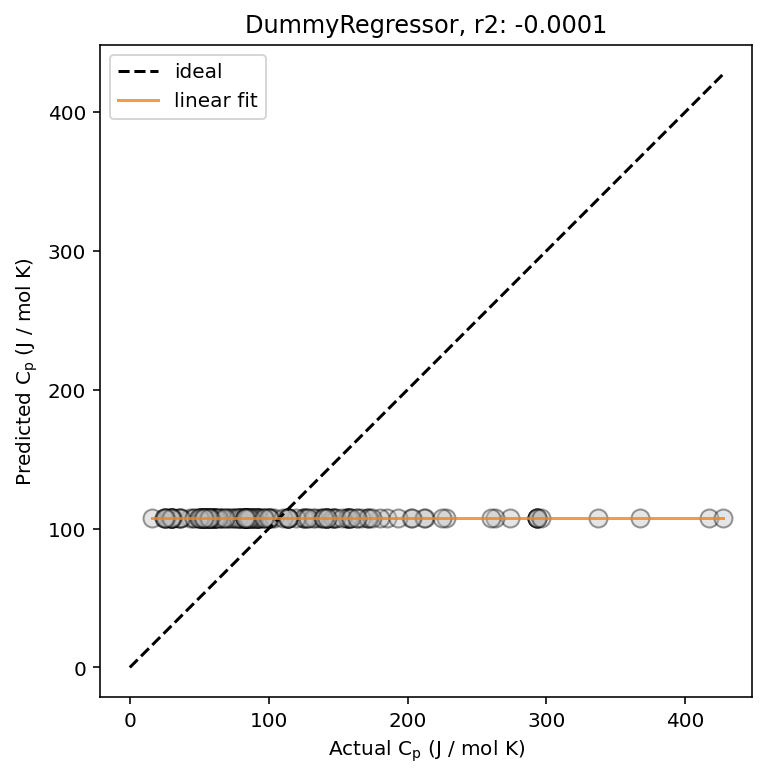

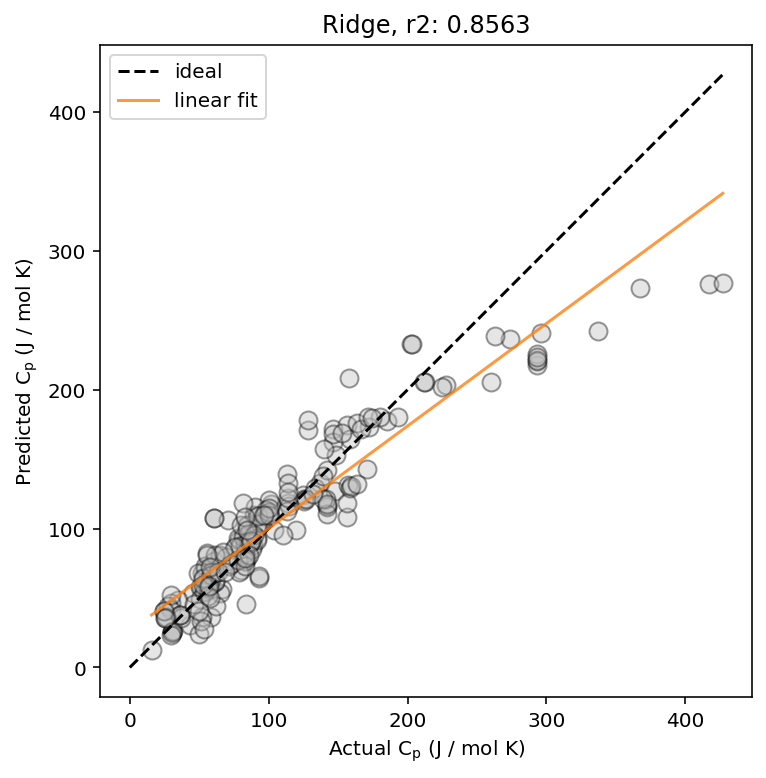

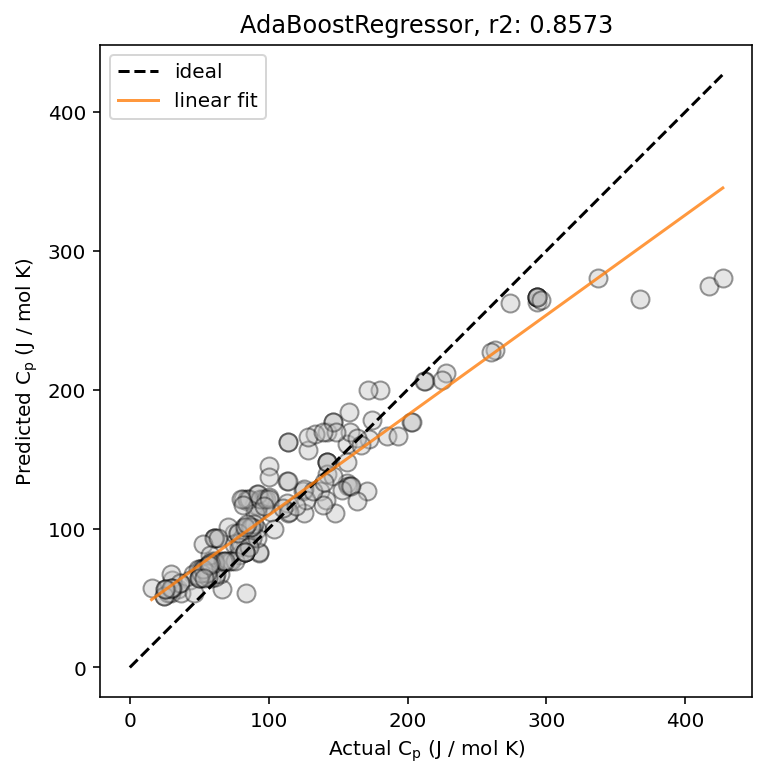

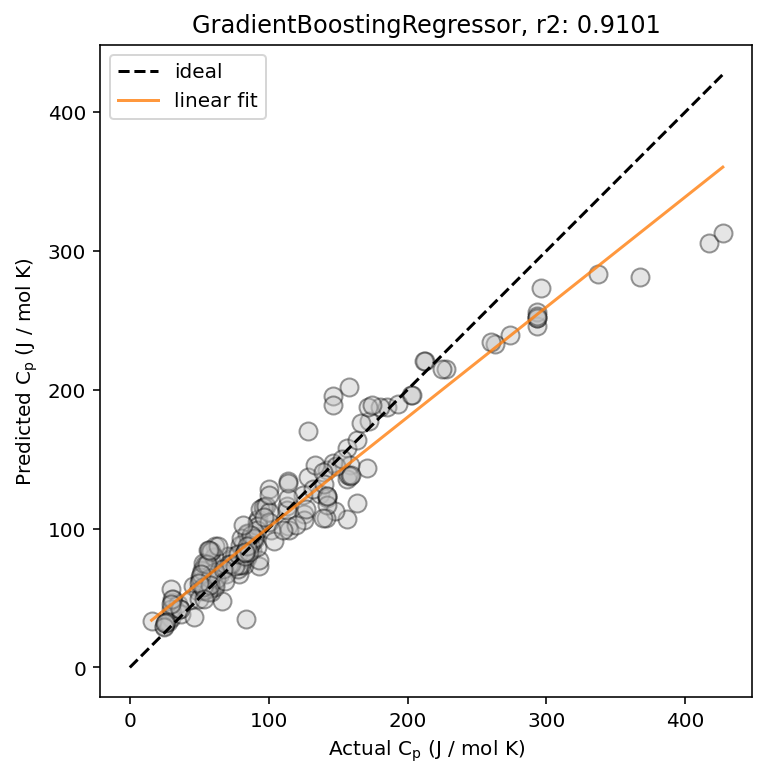

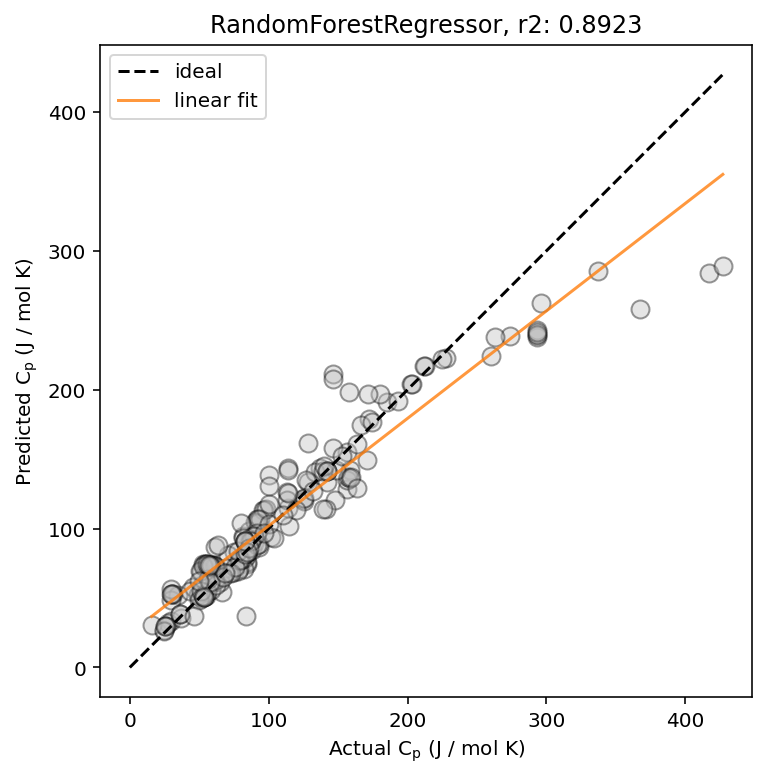

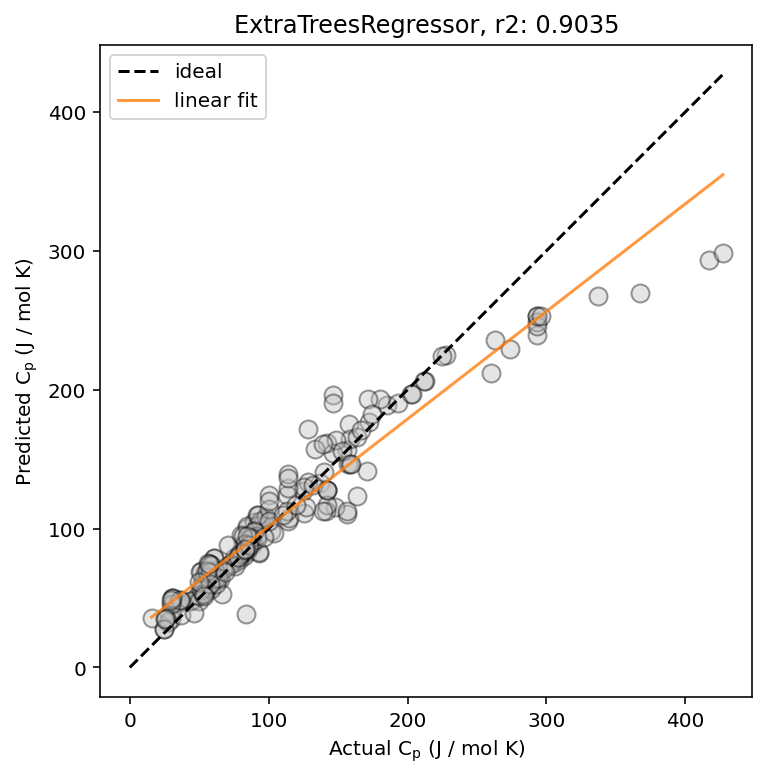

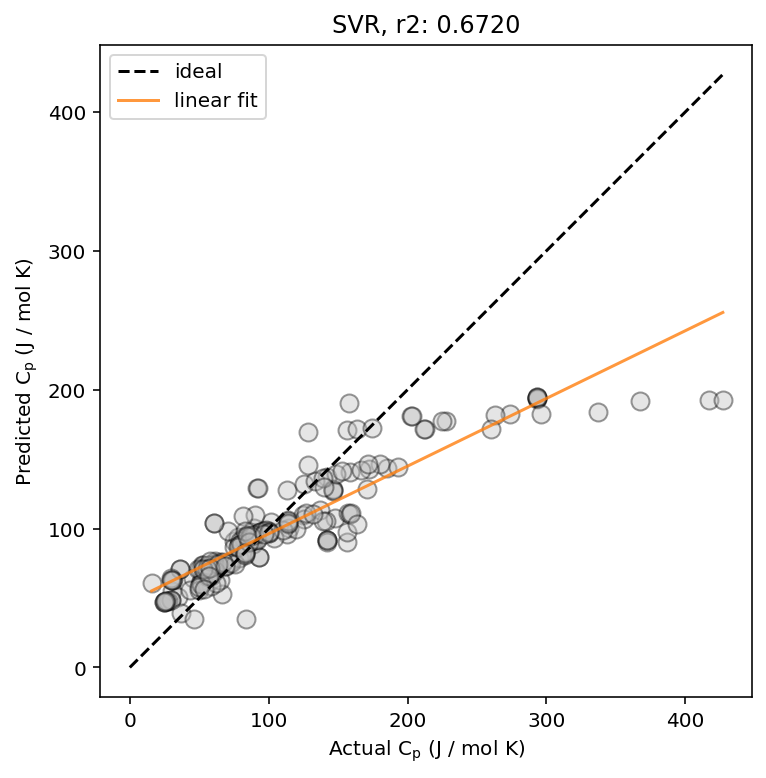

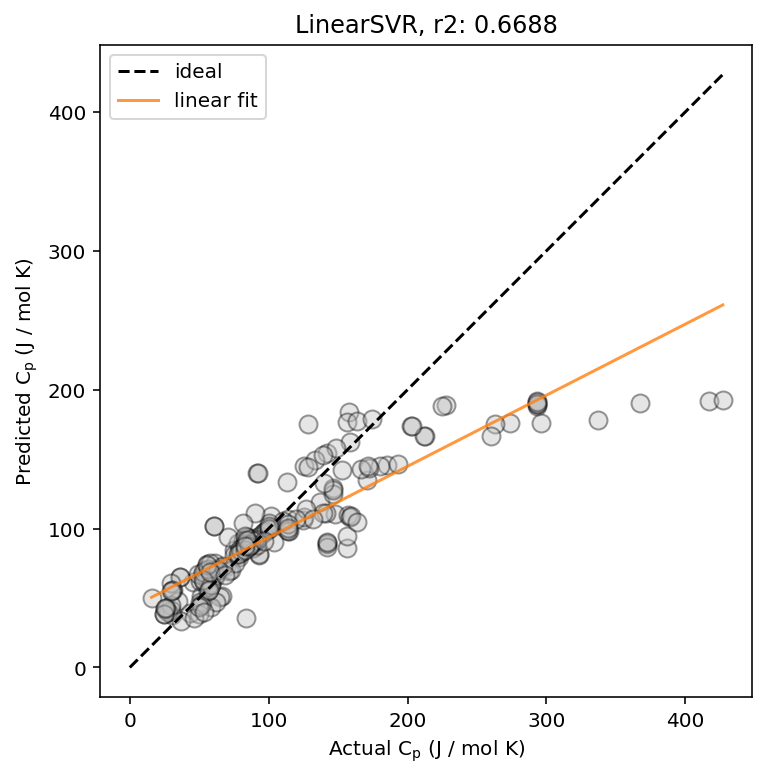

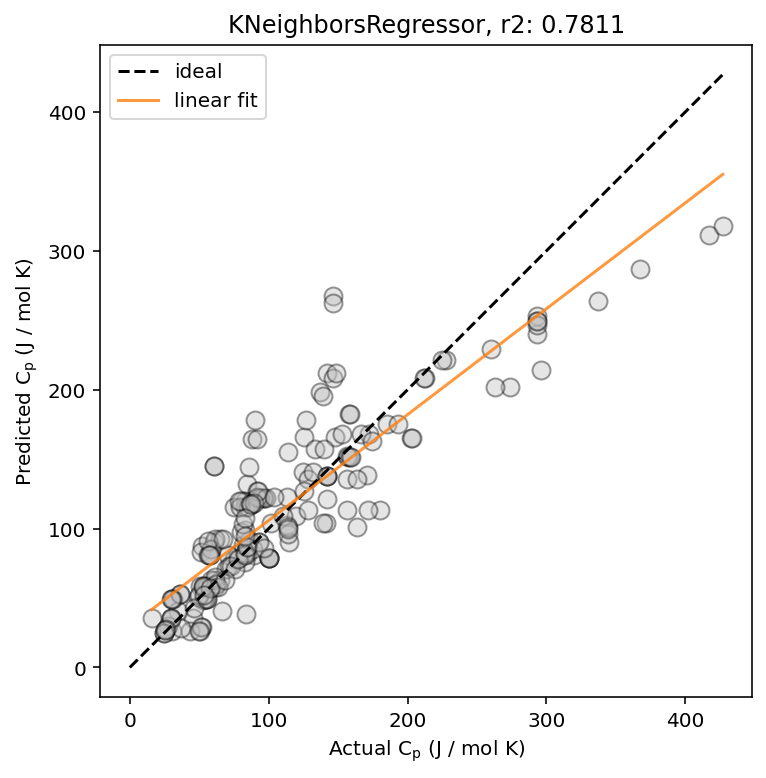

In [22]:
#This will be used to keep track of how long it takes to fit all models
ti = time()

# Gives a count of the model number
count = 0

extn_str = '.jpg'

#for every model in the list
for m in models_dict:
   
    #instantiating the model
    model = models_dict[m]()
    
#Note: To refer to the model name:m
#      To refer to the model: model
    
    print('Evaluating Model Number:', count )
    print('Model Name: ', m)

    #fitting the model to the training data
    model.fit(X_train,y_train)
    fit_time = time() - ti

    #evaluating the model on train data
    y_pred_train = model.predict(X_train)
    r2_train = r2_score(y_train,y_pred_train)
    mae_train = mean_absolute_error(y_train,y_pred_train)
    rmse_train = mean_squared_error(y_train,y_pred_train,squared=False)

    #evaluating the model on val data
    y_pred_val = model.predict(X_val)
    r2_val = r2_score(y_val,y_pred_val)
    mae_val = mean_absolute_error(y_val,y_pred_val)
    rmse_val = mean_squared_error(y_val,y_pred_val,squared=False)

    #storing reults found in a dict
    result_dict = {'model_name':m,
                   'model':model,
                  'model_params':model.get_params(),
                  'fit_time':fit_time,
                  'r2_train':r2_train,
                  'mae_train': mae_train,
                  'rmse_train': rmse_train,
                    'r2_val': r2_val,
                  'mae_val': mae_val,
                  'rmse_val': rmse_val}

    #adding that dict to a list of dict, containing all model results
    results_list.append(result_dict)
    
    #adding the list to a dataframe to be printed out  nicely
    df_modelResults = df_modelResults.append(result_dict,ignore_index=True)
    
    print('Finished fitting:',m) 
    
    count+=1
    
    #Plotting the Pred versus Actual for each model
    print('Plotting:',m)
    
    print('------------------------')

    
    reg_line=True
    
    #Will give each model it's correct label
    label='$\mathrm{C}_\mathrm{p}$ (J / mol K)'
    
    xy_max = np.max([np.max(y_val), np.max(y_pred_val)])

    plot = plt.figure(figsize=(6,6))
    plt.plot(y_val, y_pred_val, 'o', ms=9, mec='k', mfc='silver', alpha=0.4)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    
   
    polyfit = np.polyfit(y_val, y_pred_val, deg=1)
    reg_ys = np.poly1d(polyfit)(np.unique(y_val))
    plt.plot(np.unique(y_val), reg_ys, alpha=0.8, label='linear fit')
        
    plt.axis('scaled')
    plt.xlabel(f'Actual {label}')
    plt.ylabel(f'Predicted {label}')
    plt.title(f'{type(model).__name__}, r2: {r2_score(y_val, y_pred_val):0.4f}')
    plt.legend(loc='upper left')
    
    #saving the every plot under it's shortened name .png
    save_str = m+extn_str
    plt.savefig(save_str)
    
    
dt = time()-ti
print('Finished all models, total time elapsed:',dt)


In [23]:
results_list
#NOTE: this is very long due to the model params

[{'model_name': 'dumr',
  'model': DummyRegressor(),
  'model_params': {'constant': None, 'quantile': None, 'strategy': 'mean'},
  'fit_time': 0.0,
  'r2_train': 0.0,
  'mae_train': 47.451805093000004,
  'rmse_train': 60.600843843946755,
  'r2_val': -9.017583473180935e-05,
  'mae_val': 52.57739085,
  'rmse_val': 71.97119006918523},
 {'model_name': 'rr',
  'model': Ridge(),
  'model_params': {'alpha': 1.0,
   'copy_X': True,
   'fit_intercept': True,
   'max_iter': None,
   'normalize': 'deprecated',
   'positive': False,
   'random_state': None,
   'solver': 'auto',
   'tol': 0.001},
  'fit_time': 2.7476603984832764,
  'r2_train': 0.8754841059258045,
  'mae_train': 14.429937288340458,
  'rmse_train': 21.38410446044855,
  'r2_val': 0.8562920512481219,
  'mae_val': 17.456203454868525,
  'rmse_val': 27.282206929166065},
 {'model_name': 'abr',
  'model': AdaBoostRegressor(),
  'model_params': {'base_estimator': None,
   'learning_rate': 1.0,
   'loss': 'linear',
   'n_estimators': 50,
   '

In [24]:
# Sort in order of increasing validation r2 score
df_modelResults = df_modelResults.sort_values('r2_val', ignore_index=True)

df_modelResults

,model_name,model,model_params,fit_time,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val
0,dumr,DummyRegressor(),"{'constant': None, 'quantile': None, 'strategy...",0.0,0.0,47.451805,60.600844,-0.00009,52.577391,71.97119
1,lsvr,LinearSVR(),"{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_...",45.566432,0.76438,16.946211,29.416053,0.66876,23.237558,41.420057
2,svr,SVR(),"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",44.133309,0.764333,16.696276,29.419015,0.671962,24.567773,41.219329
3,knr,KNeighborsRegressor(),"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",45.785244,0.981833,3.893071,8.168084,0.781098,23.286375,33.671628
4,rr,Ridge(),"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",2.74766,0.875484,14.429937,21.384104,0.856292,17.456203,27.282207
5,abr,"(DecisionTreeRegressor(max_depth=3, random_sta...","{'base_estimator': None, 'learning_rate': 1.0,...",6.06501,0.921298,14.154024,17.000911,0.857318,20.399551,27.184656
6,rfr,"(DecisionTreeRegressor(max_features='auto', ra...","{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",35.462929,0.998452,1.213505,2.384221,0.892262,14.044695,23.622327
7,etr,"(ExtraTreeRegressor(random_state=1169772158), ...","{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",43.102441,0.999995,0.010897,0.134942,0.903468,13.360546,22.360183
8,gbr,([DecisionTreeRegressor(criterion='friedman_ms...,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",15.809258,0.984688,5.406267,7.498767,0.910056,14.258005,21.583682


NOTE: Some of my predictions are slighlty off the ones from the articles, AdaBoost and Ridge are in wrong order

## Re Training the best performing model on combined train and val

In [25]:
# Find the best-performing model that we have tested
best_row = df_modelResults.iloc[-1, :].copy()

#NOTE: iloc is an index based function, use it to get a function at an index

# Get the model type and model parameters
model_name = best_row['model_name']
model_params = best_row['model_params']

# Instantiate the model again using the parameters
model = models_dict[model_name](**model_params)
print('Best Model is:', model, model_params)

Best Model is: GradientBoostingRegressor() {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [26]:
# Concatenate the train and validation datasets together, will use this to re train Gradient model
X_train_new = np.concatenate((X_train, X_val), axis=0)
y_train_new = pd.concat((y_train, y_val), axis=0)

print(X_train_new.shape)

(2200, 177)


Finished fitting best model, total time: 10.42 s
r2: 0.8296
mae: 18.4275
rmse: 32.4479


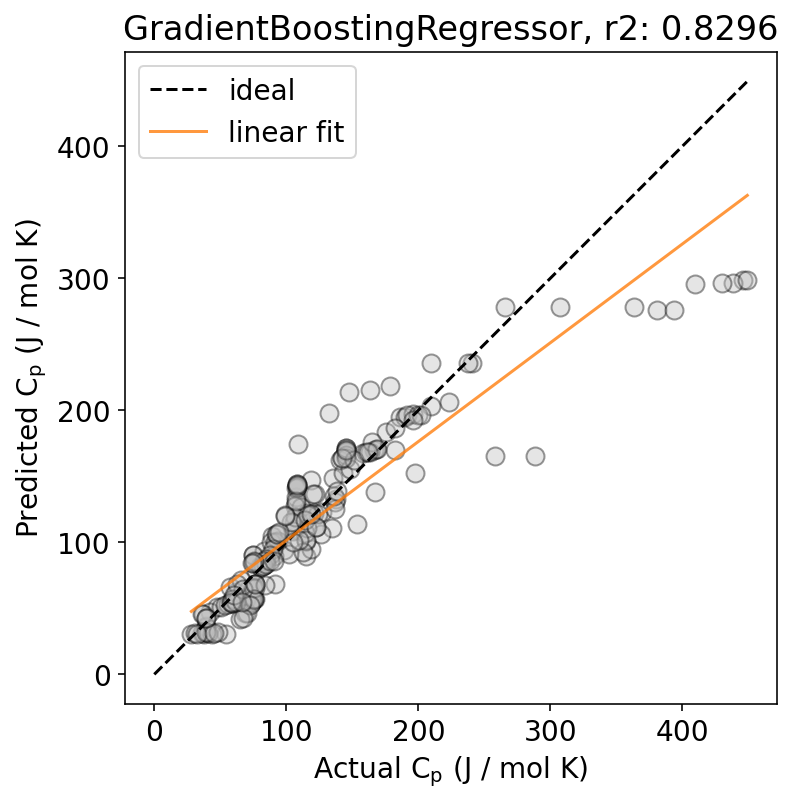

In [31]:
#Record the time
ti = time()

#fit the model on the new bigger datatset
model.fit(X_train_new, y_train_new)

dt = time() - ti
print(f'Finished fitting best model, total time: {dt:0.2f} s')

#Computing the stats
y_pred_test = model.predict(X_test)
r2 = r2_score(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = mean_squared_error(y_test,y_pred_test,squared=False)

#printing out stats
print(f'r2: {r2:0.4f}')
print(f'mae: {mae:0.4f}')
print(f'rmse: {rmse:0.4f}')

# Plotting results found
reg_line=True

label='$\mathrm{C}_\mathrm{p}$ (J / mol K)'
    
xy_max = np.max([np.max(y_test), np.max(y_pred_test)])

plot = plt.figure(figsize=(6,6))
plt.plot(y_test, y_pred_test, 'o', ms=9, mec='k', mfc='silver', alpha=0.4)
plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    
polyfit = np.polyfit(y_test, y_pred_test, deg=1)
reg_ys = np.poly1d(polyfit)(np.unique(y_test))
plt.plot(np.unique(y_test), reg_ys, alpha=0.8, label='linear fit')
        
plt.axis('scaled')
plt.xlabel(f'Actual {label}')
plt.ylabel(f'Predicted {label}')
plt.title(f'{type(model).__name__}, r2: {r2_score(y_test, y_pred_test):0.4f}')
plt.legend(loc='upper left')

plt.savefig('GradientBoostingFinal.jpg')
